# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
import joblib, pandas as pd
import os, json, joblib


In [2]:
print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)

scikit-learn version: 1.3.2
pandas version: 1.4.4


# Loading data

In [4]:
df = pd.read_json('./archive/properties.json', lines=True)

In [5]:
df.head()

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,...,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",{'$date': '2019-07-14T11:25:46.511+0000'},...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",{'$date': '2019-07-14T11:25:46.677+0000'},...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,{'$oid': '5d2b113a43cbfd7c77a99931'},room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",{'$date': '2019-07-14T11:25:46.834+0000'},...,1,Shared,Yes,Shared,Felix,4466569.0,20-07-2019,05-07-2018,https://resources.kamernet.nl/Content/images/p...,NaN
3,{'$oid': '5d2b113a43cbfd7c77a9994a'},room-1680036,16 m2,16,Assen,https://resources.kamernet.nl/image/84e95365-6...,done,{'$date': '2019-07-18T22:00:31.018+0000'},"[{'$date': '2019-07-14T11:25:46.988+0000'}, {'...",{'$date': '2019-07-14T11:25:46.988+0000'},...,4,Shared,Yes,Shared,Albert,783341.0,26-07-2019,09-11-2006,https://resources.kamernet.nl/Content/images/p...,NaN
4,{'$oid': '5d2b113b43cbfd7c77a9997c'},room-1691356,22 m2,22,Rotterdam,https://resources.kamernet.nl/Content/images/p...,done,{'$date': '2019-08-12T02:06:14.635+0000'},"[{'$date': '2019-07-14T11:25:47.193+0000'}, {'...",{'$date': '2019-07-14T11:25:47.193+0000'},...,1,Shared,No,Shared,John,3338401.0,19-07-2019,24-08-2014,https://resources.kamernet.nl/image/3177baf7-5...,NaN


In [6]:
df.columns

Index(['_id', 'externalId', 'areaRaw', 'areaSqm', 'city', 'coverImageUrl',
       'crawlStatus', 'crawledAt', 'datesPublished', 'firstSeenAt', 'furnish',
       'lastSeenAt', 'latitude', 'longitude', 'postalCode', 'postedAgo',
       'propertyType', 'rawAvailability', 'rent', 'rentDetail', 'rentRaw',
       'source', 'title', 'url', 'additionalCosts', 'additionalCostsRaw',
       'deposit', 'depositRaw', 'descriptionNonTranslated',
       'descriptionNonTranslatedRaw', 'descriptionTranslated',
       'descriptionTranslatedRaw', 'detailsCrawledAt', 'energyLabel', 'gender',
       'internet', 'isRoomActive', 'kitchen', 'living', 'matchAge',
       'matchAgeBackup', 'matchCapacity', 'matchGender', 'matchGenderBackup',
       'matchLanguages', 'matchStatus', 'matchStatusBackup', 'pageDescription',
       'pageTitle', 'pets', 'registrationCost', 'registrationCostRaw',
       'roommates', 'shower', 'smokingInside', 'toilet', 'userDisplayName',
       'userId', 'userLastLoggedOn', 'userMember

In [7]:
df['pc4'] = df['postalCode'].str.extract(r'(\d{4})')

In [8]:
df['pc4'].nunique()

1824

In [9]:
df['pc4'].duplicated().sum()

44898

In [10]:
df['firstSeenAt_str'] = df['firstSeenAt'].astype(str).str.slice(11,21)
pd.to_datetime(df['firstSeenAt_str'], format='%Y-%m-%d')
df.head()

print('max ', df['firstSeenAt_str'].max() , 'min ', df['firstSeenAt_str'].min())

max  2020-03-03 min  2019-07-14


In [11]:
df['rent_adj'] = df['rent'] * 1.203

In [12]:
df.describe()

,areaSqm,latitude,longitude,rent,additionalCosts,deposit,userId,rent_adj
count,46722.000000,46722.000000,46722.000000,46722.000000,14301.000000,27704.000000,4.662200e+04,46722.000000
mean,31.616626,52.201846,5.314911,667.745516,69.648346,713.447083,3.425398e+06,803.297856
std,29.863150,0.517203,0.798989,416.667339,132.432817,942.256946,1.327936e+06,501.250809
min,6.000000,50.770041,3.410016,1.000000,0.000000,0.000000,6.240000e+02,1.203000
25%,14.000000,51.925491,4.711688,395.000000,0.000000,360.000000,2.894253e+06,475.185000
50%,20.000000,52.162498,5.082988,550.000000,13.000000,500.000000,3.934324e+06,661.650000
75%,40.000000,52.370420,5.896362,800.000000,99.000000,850.000000,4.515906e+06,962.400000
max,675.000000,53.434608,7.206637,5999.000000,5000.000000,107514.000000,4.854533e+06,7216.797000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46722 entries, 0 to 46721
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          46722 non-null  object 
 1   externalId                   46722 non-null  object 
 2   areaRaw                      46722 non-null  object 
 3   areaSqm                      46722 non-null  int64  
 4   city                         46722 non-null  object 
 5   coverImageUrl                46722 non-null  object 
 6   crawlStatus                  46722 non-null  object 
 7   crawledAt                    46722 non-null  object 
 8   datesPublished               46722 non-null  object 
 9   firstSeenAt                  46722 non-null  object 
 10  furnish                      46722 non-null  object 
 11  lastSeenAt                   46722 non-null  object 
 12  latitude                     46722 non-null  float64
 13  longitude       

In [14]:
df['crawlStatus'].value_counts()

done           46622
unavailable      100
Name: crawlStatus, dtype: int64

In [15]:
df = df[df['crawlStatus'] == 'done']

In [16]:
df['crawlStatus'].value_counts()

done    46622
Name: crawlStatus, dtype: int64

In [17]:
df['city'].nunique()

737

In [18]:
df['pc4'].duplicated().sum()

44801

In [20]:
df_selected = df[['areaSqm', 'city', 'furnish', 'latitude', 'longitude', 'propertyType', 'rent_adj', 'internet', 'kitchen', 'living',
            'pets', 'shower', 'smokingInside', 'toilet', 'pc4']]

In [21]:
X = df_selected.drop('rent_adj', axis=1)

In [22]:
{column: len(X[column].unique()) for column in X.select_dtypes("object").columns}

{'city': 737,
 'furnish': 4,
 'propertyType': 5,
 'internet': 3,
 'kitchen': 4,
 'living': 4,
 'pets': 3,
 'shower': 4,
 'smokingInside': 3,
 'toilet': 4,
 'pc4': 1821}

In [23]:
cat_cols = ['city','furnish','propertyType','internet','kitchen','living',
            'pets','shower','smokingInside','toilet']

def to_nan_clean(s: pd.Series) -> pd.Series:
    s = s.astype("string")            # keeps real NA as <NA>
    s = s.str.strip()                 # remove spaces
    s = s.replace(r'^\s*$', pd.NA, regex=True)  # empty/whitespace -> NA
    s = s.str.lower()
    s = s.replace({
        'unknown': pd.NA,
        'none': pd.NA,
        'nan': pd.NA,                 # handles string "nan"
        'n/a': pd.NA,
        'not specified': pd.NA
    })
    # optional: unify synonyms
    s = s.replace({'private':'own', 'yes':'yes', 'no':'no'})
    return s

In [24]:
for c in cat_cols:
    if c in df_selected.columns:
        df_selected[c] = to_nan_clean(df_selected[c])

# sanity check
for c in cat_cols:
    print(c, df_selected[c].value_counts(dropna=False))

/tmp/ipykernel_87235/281890973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[c] = to_nan_clean(df_selected[c])


city amsterdam        8075
groningen        5070
rotterdam        4461
enschede         2297
den haag         2183
                 ... 
bocholtz            1
rekken              1
kloosterburen       1
't harde            1
elst ut             1
Name: city, Length: 736, dtype: Int64
furnish furnished      20887
unfurnished    19228
uncarpeted      6145
<NA>             362
Name: furnish, dtype: Int64
propertyType room                 30416
apartment            11785
studio                4080
anti-squat             336
student residence        5
Name: propertyType, dtype: Int64
internet yes     35642
<NA>     8146
no       2834
Name: internet, dtype: Int64
kitchen shared    27593
own       11131
<NA>       7898
Name: kitchen, dtype: Int64
living <NA>      19019
shared    15664
own       11939
Name: living, dtype: Int64
pets no                     42686
by mutual agreement     1991
yes                     1945
Name: pets, dtype: Int64
shower shared    28752
own       10210
<NA>       7

In [25]:
df_selected['toilet'].value_counts(dropna=False)

shared    28809
own       10123
<NA>       7690
Name: toilet, dtype: Int64

In [26]:
X = df_selected.drop('rent_adj', axis=1)

In [27]:
{column: len(X[column].unique()) for column in X.select_dtypes(include=["string","object"]).columns}

{'city': 736,
 'furnish': 4,
 'propertyType': 5,
 'internet': 3,
 'kitchen': 3,
 'living': 3,
 'pets': 3,
 'shower': 3,
 'smokingInside': 3,
 'toilet': 3,
 'pc4': 1821}

In [29]:
city_counts = df_selected['city'].value_counts()
rare_cities = city_counts[city_counts < 10].index
df_selected.loc[df_selected['city'].isin(rare_cities), 'city'] = 'other'

In [31]:
len (rare_cities)

530

In [37]:
df_selected['city'].nunique()

207

# Saving and loading df

In [12]:
df_selected.to_parquet("df_selected.parquet", index=False)

NameError: name 'df_selected' is not defined

In [13]:
df_selected= pd.read_parquet("df_selected.parquet")

In [14]:
df_selected['rent_adj'] = df_selected['rent_adj'] * 1.3

In [15]:
df_selected

,areaSqm,city,furnish,latitude,longitude,propertyType,rent_adj,internet,kitchen,living,pets,shower,smokingInside,toilet,pc4
0,14,rotterdam,unfurnished,51.896601,4.514993,room,781.9500,yes,shared,<NA>,no,shared,no,shared,3074
1,30,amsterdam,furnished,52.370200,4.920721,studio,1485.7050,yes,own,own,no,own,no,own,1018
2,11,amsterdam,furnished,52.350880,4.854786,room,1563.9000,yes,shared,shared,yes,shared,yes,shared,1075
3,16,assen,unfurnished,53.013494,6.561012,room,453.5310,yes,shared,<NA>,no,shared,yes,shared,9407
4,22,rotterdam,unfurnished,51.932871,4.479732,room,742.8525,<NA>,own,own,no,shared,no,shared,3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46617,28,rotterdam,furnished,51.928624,4.507187,room,1251.1200,yes,shared,shared,no,shared,no,shared,3061
46618,16,harmelen,furnished,52.086568,4.959942,room,625.5600,yes,shared,shared,no,shared,no,shared,3481
46619,30,rotterdam,furnished,51.928624,4.507187,room,1485.7050,yes,shared,shared,no,shared,no,shared,3061
46620,35,rotterdam,furnished,51.928624,4.507187,room,1642.0950,yes,shared,shared,no,shared,no,shared,3061


In [16]:
df_selected['pc4'].nunique()

1821

In [17]:
target = 'rent_adj'
features = ['areaSqm', 'city', 'furnish', 'latitude', 'longitude', 'propertyType', 'internet', 'kitchen', 'living',
            'pets', 'shower', 'smokingInside', 'toilet', 'pc4']
# 1) Split first
train_idx, test_idx = train_test_split(df_selected.index, test_size=0.15, random_state=42)
train = df_selected.loc[train_idx].copy()
test  = df_selected.loc[test_idx].copy()

# 2) Compute priors *on train only*
gmean = train[target].mean()
m = 50  # smoothing strength

city_stats = train.groupby('city')[target].agg(['mean','size'])
city_stats['city_prior'] = (city_stats['size']*city_stats['mean'] + m*gmean) / (city_stats['size'] + m)

pc4_stats = train.groupby('pc4')[target].agg(['mean','size'])
pc4_stats['pc4_prior'] = (pc4_stats['size']*pc4_stats['mean'] + m*gmean) / (pc4_stats['size'] + m)

# 3) Apply priors to train and test 
train['city_prior'] = train['city'].map(city_stats['city_prior']).fillna(gmean)
test['city_prior']  = test['city'].map(city_stats['city_prior']).fillna(gmean)

train['pc4_prior']  = train['pc4'].map(pc4_stats['pc4_prior']).fillna(train['city_prior']).fillna(gmean)
test['pc4_prior']   = test['pc4'].map(pc4_stats['pc4_prior']).fillna(test['city_prior']).fillna(gmean)


In [18]:
city_stats

,mean,size,city_prior
city,,,
aalsmeer,1632.364067,18,1198.816809
abcoude,1032.382520,15,1040.349656
alkmaar,981.515153,163,995.887135
almelo,693.970600,39,889.908351
almere,1026.951052,524,1028.326378
...,...,...,...
zoetermeer,749.928507,61,881.825484
zoeterwoude,2248.540667,9,1226.675522
zuidhorn,822.263867,9,1009.107875


In [19]:
print (len(df_selected), len(train), len(test))

46622 39628 6994


In [20]:
pc4_stats

,mean,size,pc4_prior
pc4,,,
1011,1882.153650,66,1520.337334
1012,2027.272399,140,1768.184872
1013,1851.741810,130,1627.019028
1014,2389.639200,6,1187.050447
1015,1943.193141,66,1555.066699
...,...,...,...
9936,602.101500,1,1034.099830
9942,1016.535000,1,1042.225977
9948,397.230600,5,984.057142


In [21]:
train['pc4'].nunique()

1761

# Preprocessing of data

In [ ]:

target = 'rent_adj'

# NUMERIC features
num_cols = ['areaSqm', 'latitude', 'longitude', 'city_prior', 'pc4_prior']

# CATEGORICAL features (low-cardinality)
cat_cols = ['propertyType','furnish','internet','kitchen','shower','toilet','living','smokingInside','pets']


In [23]:
# Build matrices (drop raw city/pc4 — we use priors instead)
X_train = train[num_cols + cat_cols].copy()
y_train = train[target].astype(float).copy()

X_test  = test[num_cols + cat_cols].copy()
y_test  = test[target].astype(float).copy()

In [24]:
# Imputers/encoders
num_pre = SimpleImputer(strategy='median')
cat_pre = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ('num', num_pre, num_cols),
        ('cat', cat_pre, cat_cols)
    ],
    remainder='drop'
)

# Modeling

## HistGradientBoost

In [70]:
# Model
model = HistGradientBoostingRegressor(
    learning_rate=0.06,
    max_iter=500,
    random_state=42
)

pipe = Pipeline(steps=[('pre', pre), ('model', model)])


In [75]:
# Train 
pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['areaSqm', 'latitude',
                                                   'longitude', 'city_prior',
                                                   'pc4_prior']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['propertyType', 'furnish',
                                                   'internet', 'kitchen',
                                                   'shower', 'toilet', 'living',
                                                   'smokingInside',
                                                   'pets'])])),
                ('model',
                 HistGradientBoostingRegressor(learning_rate=0.06, max_iter=500,
                                               random_state=42))])

In [27]:
X_train[cat_cols].dtypes

propertyType     string
furnish          string
internet         string
kitchen          string
shower           string
toilet           string
living           string
smokingInside    string
pets             string
dtype: object

In [28]:
for c in cat_cols:
    X_train[c] = X_train[c].astype(str)
    X_test[c]  = X_test[c].astype(str)

In [29]:
X_train[cat_cols].dtypes

propertyType     object
furnish          object
internet         object
kitchen          object
shower           object
toilet           object
living           object
smokingInside    object
pets             object
dtype: object

In [76]:
# evaluate
pred = pipe.predict(X_test)

In [77]:
print("Test MAE :", mean_absolute_error(y_test, pred))
print("Test RMSE:", mean_squared_error(y_test, pred, squared=False))
print("Test R²  :", r2_score(y_test, pred))

Test MAE : 188.64858083557408
Test RMSE: 339.3116122469587
Test R²  : 0.8141846946310852


## randomforest model

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
rf = RandomForestRegressor(
    n_estimators=600,        # more trees = steadier predictions
    max_depth=None,         # let trees grow; can tune later
    min_samples_leaf=2,     # small leaf to reduce overfit
    max_features="sqrt",    # classic setting for RF
    n_jobs=-1,              # use all cores
    random_state=42
)

pipe_rf = Pipeline(steps=[("pre", pre), ("model", rf)])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['areaSqm', 'latitude',
                                                   'longitude', 'city_prior',
                                                   'pc4_prior']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['propertyType', 'furnish',
                                                   'internet', 'kitchen',
                                                   'shower', 'toilet', 'living',
                                                   'smokingInside',
                                                   'pets'])])),
                ('model',
                 RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                                       n_estimators=600, n_jobs=-1,
                                       random_state=42))])

In [80]:
pred_rf = pipe_rf.predict(X_test)

In [81]:
print("RF Test MAE :", mean_absolute_error(y_test, pred_rf))
print("RF Test RMSE:", mean_squared_error(y_test, pred_rf, squared=False))
print("RF Test R²  :", r2_score(y_test, pred_rf))

RF Test MAE : 177.38699152810085
RF Test RMSE: 339.42906067840147
RF Test R²  : 0.814056037123545


In [82]:
train_pred = pipe_rf.predict(X_train)
test_pred  = pipe_rf.predict(X_test)


print("Train R² :", r2_score(y_train, train_pred))
print("Test  R² :", r2_score(y_test, test_pred))
print("Train MAE:", mean_absolute_error(y_train, train_pred))
print("Test  MAE:", mean_absolute_error(y_test, test_pred))

Train R² : 0.9171309795754811
Test  R² : 0.814056037123545
Train MAE: 124.54045282313274
Test  MAE: 177.38699152810085


## Learning curve 

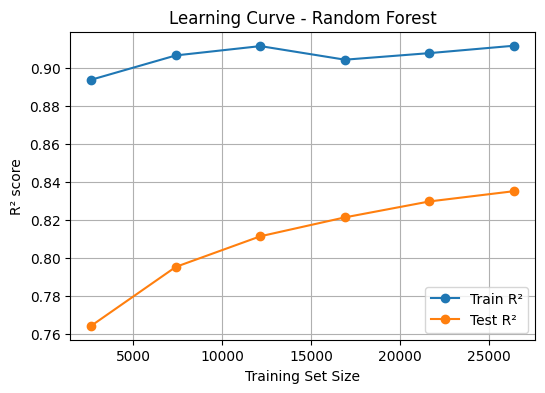

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipe_rf,
    X_train, y_train,
    cv=3,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 6),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, 'o-', label='Train R²')
plt.plot(train_sizes, test_mean, 'o-', label='Test R²')
plt.xlabel("Training Set Size")
plt.ylabel("R² score")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


## XGBoost model

In [25]:
from xgboost import XGBRegressor

In [30]:
xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

In [31]:
pipe_xgb = Pipeline(steps=[("pre", pre), ("model", xgb)])

pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['areaSqm', 'latitude',
                                                   'longitude', 'city_prior',
                                                   'pc4_prior']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['propertyType', 'furnish',
                                                   'internet', 'kitchen',
                                                   'sho...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.05, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=8, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=800, n_jobs=-1, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1.0, ...))])

In [32]:
train_pred_xgb = pipe_xgb.predict(X_train)
test_pred_xgb  = pipe_xgb.predict(X_test)


print("XGB Train R² :", r2_score(y_train, train_pred_xgb))
print("XGB Test  R² :", r2_score(y_test, test_pred_xgb))
print("XGB Train MAE:", mean_absolute_error(y_train, train_pred_xgb))
print("XGB Test  MAE:", mean_absolute_error(y_test, test_pred_xgb))

XGB Train R² : 0.9625960321853291
XGB Test  R² : 0.8449105369809006
XGB Train MAE: 88.23137827969121
XGB Test  MAE: 141.78394527332938


# Test and do a prediction 

In [33]:

# example input
sample = {
    "areaSqm": 80,
    "latitude": 52.0907,         # Utrecht
    "longitude": 5.1214,
    "city": "utrecht",
    "furnish": "furnished",
    "propertyType": "apartment",
    "internet": "yes",
    "kitchen": "own",
    "living": "own",
    "pets": "no",
    "shower": "own",
    "smokingInside": "no",
    "toilet": "own",
    "pc4": "3511"                # Utrecht center
}
sample_df = pd.DataFrame([sample])


In [34]:
sample_df

,areaSqm,latitude,longitude,city,furnish,propertyType,internet,kitchen,living,pets,shower,smokingInside,toilet,pc4
0,80,52.0907,5.1214,utrecht,furnished,apartment,yes,own,own,no,own,no,own,3511


In [35]:
# compute priors for this new sample
sample_df["city_prior"] = sample_df["city"].map(city_stats["city_prior"]).fillna(gmean)
sample_df["pc4_prior"]  = sample_df["pc4"].map(pc4_stats["pc4_prior"]).fillna(sample_df["city_prior"]).fillna(gmean)


In [36]:
sample_df

,areaSqm,latitude,longitude,city,furnish,propertyType,internet,kitchen,living,pets,shower,smokingInside,toilet,pc4,city_prior,pc4_prior
0,80,52.0907,5.1214,utrecht,furnished,apartment,yes,own,own,no,own,no,own,3511,1138.441132,1313.655048


In [37]:
X_new = sample_df[num_cols + cat_cols]

In [38]:
X_new

,areaSqm,latitude,longitude,city_prior,pc4_prior,propertyType,furnish,internet,kitchen,shower,toilet,living,smokingInside,pets
0,80,52.0907,5.1214,1138.441132,1313.655048,apartment,furnished,yes,own,own,own,own,no,no


In [39]:
predicted_rent = pipe_xgb.predict(X_new)[0]
print(f"🏠  Predicted monthly rent: €{predicted_rent:,.0f}")

🏠  Predicted monthly rent: €2,252


In [ ]:
import joblib, pandas as pd

pipe = joblib.load("rent_pipeline_xgb.pkl")
priors = joblib.load("priors.pkl")
gmean = float(priors["gmean"])
city_prior_map = priors["city_stats"]
pc4_prior_map  = priors["pc4_stats"]

num_cols = ['areaSqm','latitude','longitude','city_prior','pc4_prior']
cat_cols = ['propertyType','furnish','internet','kitchen','shower','toilet','living','smokingInside','pets']

def predict_rent(areaSqm, lat, lon, city, pc4, furnish, propertyType,
                 internet, kitchen, shower, toilet, living, smokingInside, pets):
    row = pd.DataFrame([{
        "areaSqm": areaSqm, "latitude": lat, "longitude": lon,
        "city": city, "pc4": pc4, "furnish": furnish, "propertyType": propertyType,
        "internet": internet, "kitchen": kitchen, "shower": shower, "toilet": toilet,
        "living": living, "smokingInside": smokingInside, "pets": pets
    }])
    row["city_prior"] = row["city"].map(city_prior_map).fillna(gmean)
    row["pc4_prior"]  = row["pc4"].map(pc4_prior_map).fillna(row["city_prior"]).fillna(gmean)
    X_new = row[num_cols + cat_cols].astype({c: "object" for c in cat_cols})
    return float(pipe.predict(X_new)[0])


# Model on procution 

## Step 1 — Save the model + artifacts

In [40]:
import os, json, joblib

os.makedirs("artifacts", exist_ok=True)

# 1) Save trained pipeline
joblib.dump(pipe_xgb, "artifacts/rent_pipeline_xgb.pkl")

['artifacts/rent_pipeline_xgb.pkl']

In [41]:
# 2) Save priors (convert Series to dict)
priors_payload = {
    "gmean": float(gmean),
    "city_prior": city_stats["city_prior"].to_dict(),
    "pc4_prior": pc4_stats["pc4_prior"].to_dict()
}
joblib.dump(priors_payload, "artifacts/priors.pkl")


['artifacts/priors.pkl']

In [ ]:
# 3) Save feature lists
feat = {
    "num_cols": ['areaSqm','latitude','longitude','city_prior','pc4_prior'],
    "cat_cols": ['propertyType','furnish','internet','kitchen','shower','toilet','living','smokingInside','pets']
}
with open("artifacts/features.json","w") as f:
    json.dump(feat, f)

# 4) Save uplift factor
with open("artifacts/model_meta.json","w") as f:
    json.dump({"uplift_factor": 1.30}, f)

## Step 2 — Reusable prediction helper

In [ ]:
import json, joblib
import pandas as pd
import numpy as np
from pathlib import Path

# --- load once (module/global scope) ---
ART = Path("artifacts")
pipe      = joblib.load(ART / "rent_pipeline_xgb.pkl")
priors    = joblib.load(ART / "priors.pkl")             # contains gmean, city_prior, pc4_prior
feat      = json.load(open(ART / "features.json"))
UPLIFT    = json.load(open(ART / "model_meta.json"))["uplift_factor"]

gmean = float(priors["gmean"])
city_prior_map = priors["city_prior"]
pc4_prior_map  = priors["pc4_prior"]

num_cols = feat["num_cols"]
cat_cols = feat["cat_cols"]

def predict_rent(input_data: dict) -> float:
    """
    input_data keys expected:
      areaSqm, latitude, longitude, city, pc4,
      propertyType, furnish, internet, kitchen, shower, toilet, living, smokingInside, pets
    """
    # 1) one-row frame
    row = pd.DataFrame([input_data])

    # 2) normalize text
    for c in ["city","propertyType","furnish","internet","kitchen","shower","toilet","living","smokingInside","pets"]:
        if c in row.columns:
            row[c] = row[c].astype(str).str.strip().str.lower()

    # 3) ensure pc4 (extract if user passed full postalCode)
    if "pc4" not in row or row["pc4"].isna().any():
        if "postalCode" in row:
            row["pc4"] = row["postalCode"].astype(str).str.extract(r"(\d{4})")
        else:
            row["pc4"] = np.nan
    else:
        row["pc4"] = row["pc4"].astype(str).str.extract(r"(\d{4})")

    # 4) attach priors (with sensible fallbacks)
    row["city_prior"] = row["city"].map(city_prior_map).fillna(gmean)
    row["pc4_prior"]  = row["pc4"].map(pc4_prior_map).fillna(row["city_prior"]).fillna(gmean)

    # 5) select features; cast cats to object for sklearn
    X_new = row[num_cols + cat_cols].copy()
    X_new[cat_cols] = X_new[cat_cols].astype("object")

    # 6) predict (model already trained on rent_adj with uplift applied)
    pred = float(pipe.predict(X_new)[0])
    return pred


In [47]:
sample = {
    "areaSqm": 45,
    "latitude": 52.0907, "longitude": 5.1214,   # Utrecht center-ish
    "city": "utrecht", "pc4": "3511",
    "propertyType": "apartment", "furnish": "furnished",
    "internet": "yes", "kitchen": "own", "shower": "own",
    "toilet": "own", "living": "own", "smokingInside": "no", "pets": "no"
}
print("€", round(predict_rent(sample)))

€ 1616


In [45]:
sample = {
    "areaSqm": 70,
    "latitude": 52.3431, "longitude": 5.1455,   # almere port
    "city": "almere", "pc4": "1362",
    "propertyType": "apartment", "furnish": "furnished",
    "internet": "yes", "kitchen": "own", "shower": "own",
    "toilet": "own", "living": "own", "smokingInside": "no", "pets": "no"
}
print("€", round(predict_rent(sample)))

€ 1756
